## Import Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

import spacy
nlp = spacy.load("en_core_web_sm")

In [2]:
df = pd.read_csv('ecommerceDataset.csv', header=None, names = ['label', 'text'])

df.head()

,label,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


## Data Analysis

In [3]:
df.shape

(50425, 2)

In [4]:
df['label'].value_counts()

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: label, dtype: int64

## Data Cleaning & Preprocessing

In [5]:
df.isnull().sum()

label    0
text     1
dtype: int64

In [6]:
df.dropna(inplace = True)

In [7]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [8]:
# Assigning numeric values to the target text

df['label_numeric'] = df['label'].map({
    'Household': 0,
    'Books' :1,
    'Electronics': 2,
    'Clothing & Accessories': 3
})

In [9]:
df.head()

,label,text,label_numeric
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,0
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",0
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,0
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",0
4,Household,Incredible Gifts India Wooden Happy Birthday U...,0


In [10]:
def preprocess(text):
    doc = nlp(text)

    filter_words = []

    for token in doc:
        if token.is_punct or token.is_alpha and token.is_stop:
          continue
        filter_words.append(token.lemma_.lower())

    return " ".join(filter_words)

In [11]:
for index, row in tqdm(df.iterrows(), total=len(df)):
    df.at[index, 'preprocessed_text'] = preprocess(row['text'])   
    
#.at[]: This is a method for fast label-based scalar access. 
#It's particularly useful when you need to update or retrieve a single value in a DataFrame.    

100%|████████████████████████████████████████████████████████████████████████████| 50424/50424 [24:16<00:00, 34.61it/s]


In [12]:
df.head()

,label,text,label_numeric,preprocessed_text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,0,paper plane design framed wall hanging motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",0,saf floral framed painting wood 30 inch x 10 i...
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,0,saf uv texture modern art print framed paintin...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",0,saf flower print framed painting synthetic 13....
4,Household,Incredible Gifts India Wooden Happy Birthday U...,0,incredible gifts india wooden happy birthday u...


## splitting Data

In [13]:
x = df['preprocessed_text']
y = df['label_numeric']

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)

In [15]:
clf = Pipeline([("tfidf", TfidfVectorizer()), ("Multi_NB", MultinomialNB())])

In [16]:
## MultinomialNB

clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)

train = clf.score(xtrain,ytrain)
test = clf.score(xtest, ytest)

print(f'Train Acc: {train}\nTest Acc: {test}\n\n{classification_report(ytest,ypred)}')

Train Acc: 0.9511390961600437
Test Acc: 0.9420922161626177

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3863
           1       0.98      0.91      0.94      2364
           2       0.96      0.90      0.93      2124
           3       0.98      0.95      0.97      1734

    accuracy                           0.94     10085
   macro avg       0.95      0.94      0.94     10085
weighted avg       0.94      0.94      0.94     10085



## Checking ytest and ypred

In [17]:
xtest[:5]

35511    fastrack oval unisex sunglasses p192gr1|62.1|g...
13051    simxen egg boiler electric automatic 7 egg poa...
47682    carg7 car lcd bluetooth car charger fm kit mp3...
50091    blue diamond mini mp3 player free data cable e...
35144    campus sutra men 's polyester t shirt wear cam...
Name: preprocessed_text, dtype: object

In [18]:
ytest[:5]

35511    3
13051    0
47682    2
50091    2
35144    3
Name: label_numeric, dtype: int64

In [19]:
ypred[:5]

array([3, 0, 2, 2, 3], dtype=int64)

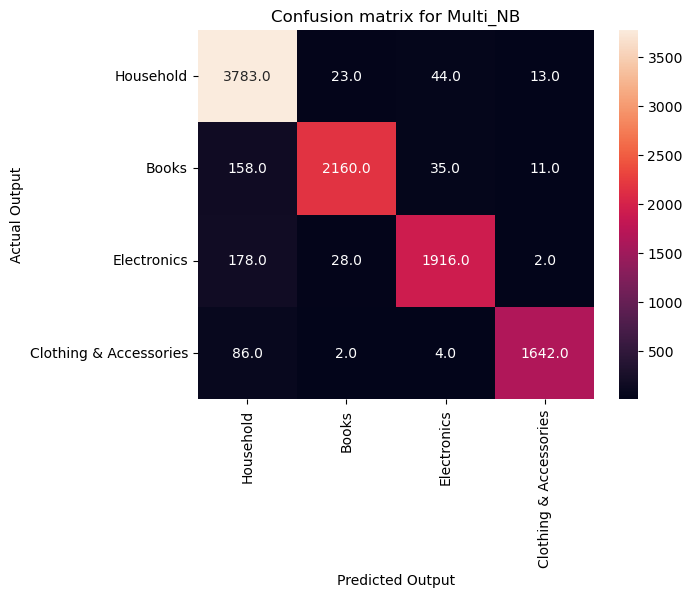

In [20]:
# Confusion Matrix

confusion_m =confusion_matrix(ytest, ypred)

sns.heatmap(confusion_m, annot = True, fmt = '.1f',
            xticklabels = ['Household', 'Books', 'Electronics', 'Clothing & Accessories'],
            yticklabels = ['Household', 'Books', 'Electronics', 'Clothing & Accessories'])
plt.xlabel('Predicted Output')
plt.ylabel('Actual Output')
plt.title("Confusion matrix for Multi_NB")
plt.show();

In [21]:
clf_rf = Pipeline([
    (("tfidf", TfidfVectorizer())),
    ('Random_forest', RandomForestClassifier())
])

In [22]:
## Random Forest Classifier

clf_rf.fit(xtrain, ytrain)

y_pred = clf_rf.predict(xtest)

rf_train = clf_rf.score(xtrain,ytrain)
rf_test = clf_rf.score(xtest, ytest)

print(f'Train ACC: {rf_train}\nTest ACC: {rf_test}\n\n{classification_report(ytest, y_pred)}')

Train ACC: 1.0
Test ACC: 0.9725334655428854

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3863
           1       0.98      0.98      0.98      2364
           2       0.98      0.94      0.96      2124
           3       0.99      0.98      0.98      1734

    accuracy                           0.97     10085
   macro avg       0.98      0.97      0.97     10085
weighted avg       0.97      0.97      0.97     10085



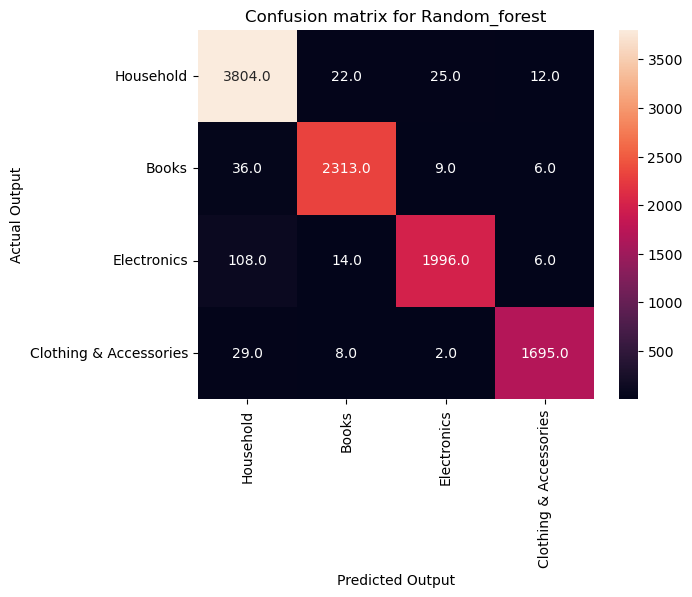

In [23]:
confusion_m =confusion_matrix(ytest, y_pred)

sns.heatmap(confusion_m, annot = True, fmt = '.1f',
             xticklabels = ['Household', 'Books', 'Electronics', 'Clothing & Accessories'],
              yticklabels = ['Household', 'Books', 'Electronics', 'Clothing & Accessories'])
plt.xlabel('Predicted Output')
plt.ylabel('Actual Output')
plt.title("Confusion matrix for Random_forest")
plt.show();